In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('data.csv')

# Sort data by date
data = data.sort_values('Date')

# Set date as index
data.set_index('Date', inplace=True)

# Select features and target
features = ['Crude_Oil_Price', 'USD_Price']
target = 'CSE_RSI'

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features + [target]])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :2])
        y.append(data[i + seq_length, 2])
    return np.array(X), np.array(y)

sequence_length = 30  # You can adjust this value
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 2)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1191 - val_loss: 0.0387
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0282 - val_loss: 0.0350
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0265 - val_loss: 0.0342
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0273 - val_loss: 0.0368
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0287 - val_loss: 0.0354
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0269 - val_loss: 0.0352
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - val_loss: 0.0328
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0247 - val_loss: 0.0336
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0250 - val_loss: 0.0318
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0245 - val_loss: 0.0303
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0235 - val_loss: 0.0336
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


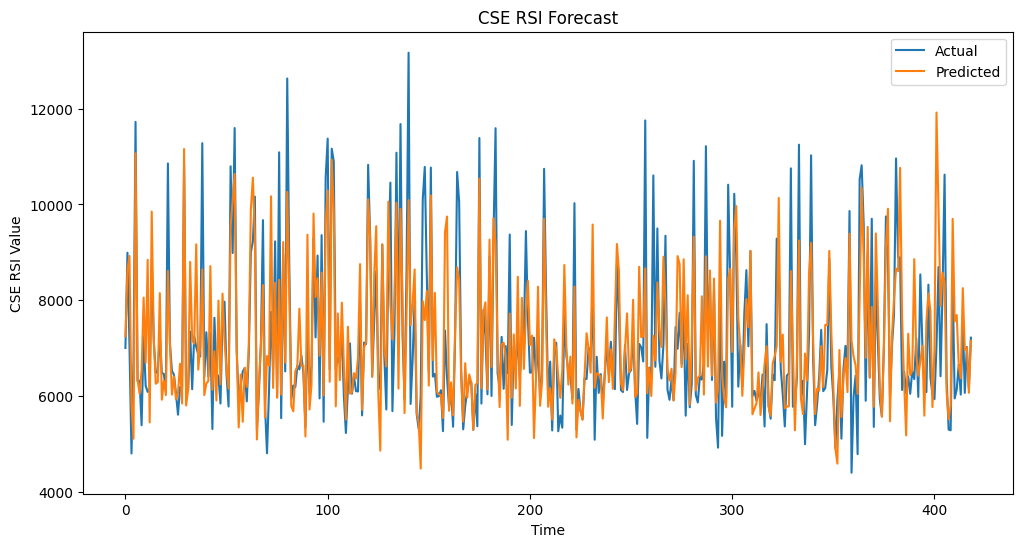

In [18]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('CSE RSI Forecast')
plt.xlabel('Time')
plt.ylabel('CSE RSI Value')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━

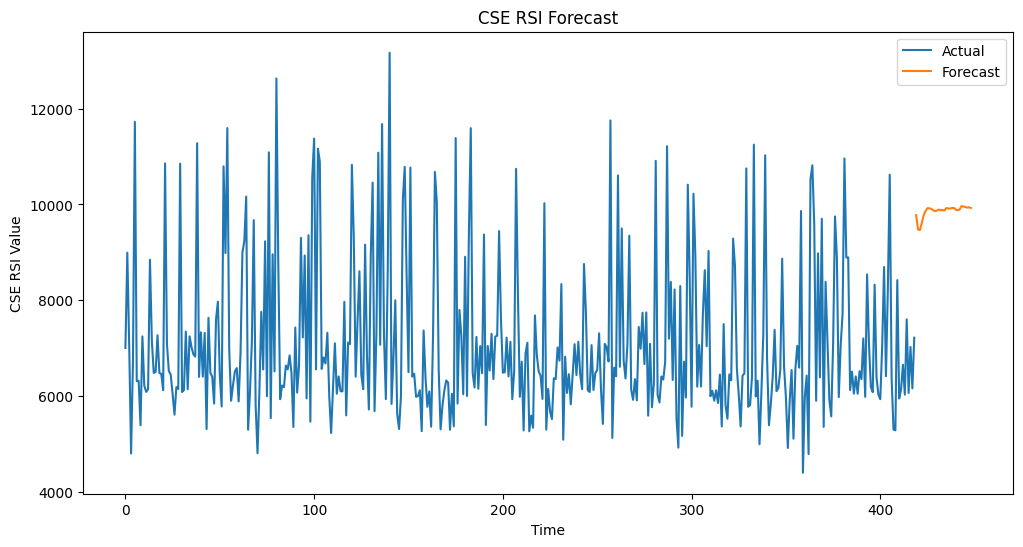

In [20]:
def forecast_future(model, last_sequence, num_steps, scaler):
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(num_steps):
        # Predict the next CSE RSI value
        next_prediction = model.predict(current_sequence.reshape(1, sequence_length, 2))
        future_predictions.append(next_prediction[0, 0])

        # Update the sequence for the next prediction
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1, :] = [current_sequence[-2, 0], current_sequence[-2, 1]]  # Assume no change in input features

    future_predictions = np.array(future_predictions)

    # Prepare for inverse transform
    last_features = current_sequence[-1, :]
    future_with_features = np.column_stack([np.tile(last_features, (num_steps, 1)), future_predictions])

    # Inverse transform
    future_forecast = scaler.inverse_transform(future_with_features)[:, -1]

    return future_forecast

# Get the last sequence from your data
last_sequence = X[-1]

# Forecast the next 30 days
future_forecast = forecast_future(model, last_sequence, 30, scaler)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual')
plt.plot(range(len(y_test_actual), len(y_test_actual) + len(future_forecast)), future_forecast, label='Forecast')
plt.legend()
plt.title('CSE RSI Forecast')
plt.xlabel('Time')
plt.ylabel('CSE RSI Value')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Today's crude oil price: $79.37
Predicted CSE RSI value: 10004.15


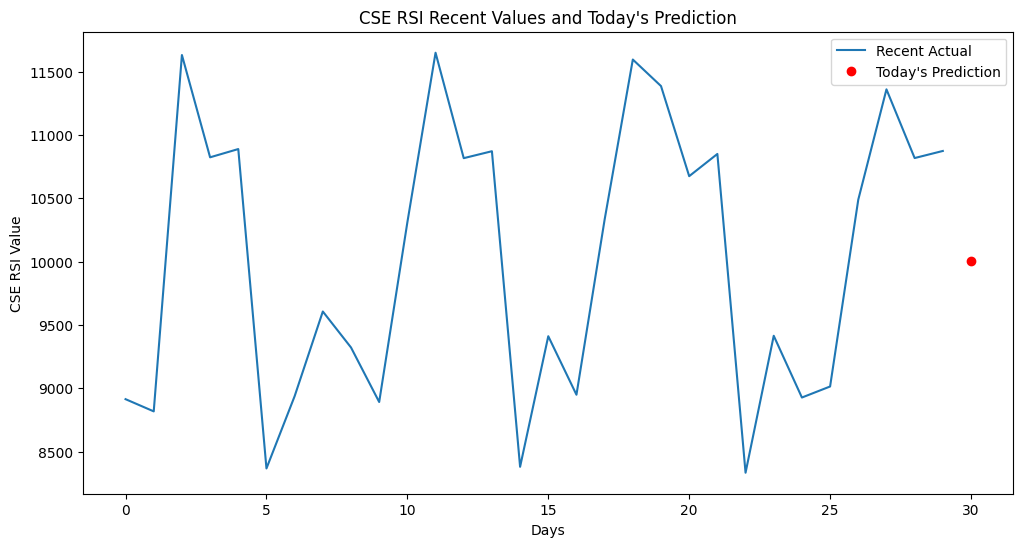

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming we have our original data in a DataFrame called 'data'

# Create separate scalers for features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit the scalers
feature_scaler.fit(data[features])
target_scaler.fit(data[[target]])

# Function to prepare sequences
def create_sequences(feature_data, target_data, seq_length):
    X, y = [], []
    for i in range(len(feature_data) - seq_length):
        X.append(feature_data[i:(i + seq_length)])
        y.append(target_data[i + seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaled_features = feature_scaler.transform(data[features])
scaled_target = target_scaler.transform(data[[target]])

# Create sequences
sequence_length = 30  # You can adjust this value
X, y = create_sequences(scaled_features, scaled_target, sequence_length)

# Split the data, train the model, etc. (as before)
today_crude_oil_price = 79.37
today_usd_price = 299.10

# Prepare input for prediction
last_known_sequence = X[-1].copy()
today_input = np.array([[today_crude_oil_price, today_usd_price]])
today_input_scaled = feature_scaler.transform(today_input)
last_known_sequence[-1] = today_input_scaled[0]

# Make prediction
prediction = model.predict(last_known_sequence.reshape(1, sequence_length, 2))

# Inverse transform the prediction
rsi_prediction = target_scaler.inverse_transform(prediction)[0][0]

print(f"Today's crude oil price: ${today_crude_oil_price:.2f}")
print(f"Predicted CSE RSI value: {rsi_prediction:.2f}")

# Optional: Plot the prediction in context of recent actual values
recent_actual = target_scaler.inverse_transform(y[-30:])  # Last 30 actual values
plt.figure(figsize=(12, 6))
plt.plot(range(len(recent_actual)), recent_actual, label='Recent Actual')
plt.plot(len(recent_actual), rsi_prediction, 'ro', label='Today\'s Prediction')
plt.legend()
plt.title('CSE RSI Recent Values and Today\'s Prediction')
plt.xlabel('Days')
plt.ylabel('CSE RSI Value')
plt.show()